# <span style = "color : red;font-size:40px"> Heart Failure Prediction </span>

***

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## <span style = "color: blue">Attribute Information</span>

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

## Let's Dive into it

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Heart.csv' dataset and store it in a DataFrame varible

In [2]:
df = pd.read_csv('Heart.csv')

### View the top 5 rows

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### View basic info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### View the basic statistical information about the dataset

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Check for null values in the dataset

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### View unique values in all categorical features

In [7]:
categorical_features = ['Sex','ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for i in categorical_features:
    print('Unique elements in ', i,'are: ', df[i].unique())

Unique elements in  Sex are:  ['M' 'F']
Unique elements in  ChestPainType are:  ['ATA' 'NAP' 'ASY' 'TA']
Unique elements in  RestingECG are:  ['Normal' 'ST' 'LVH']
Unique elements in  ExerciseAngina are:  ['N' 'Y']
Unique elements in  ST_Slope are:  ['Up' 'Flat' 'Down']


### OneHotEncoding - Convert all the categorical features into numerical data

In [8]:
newdf = pd.get_dummies(df, drop_first = True)
newdf.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


## <span style = "color:orange"> Visualization </span>

### Plot a pair plot of the dataset

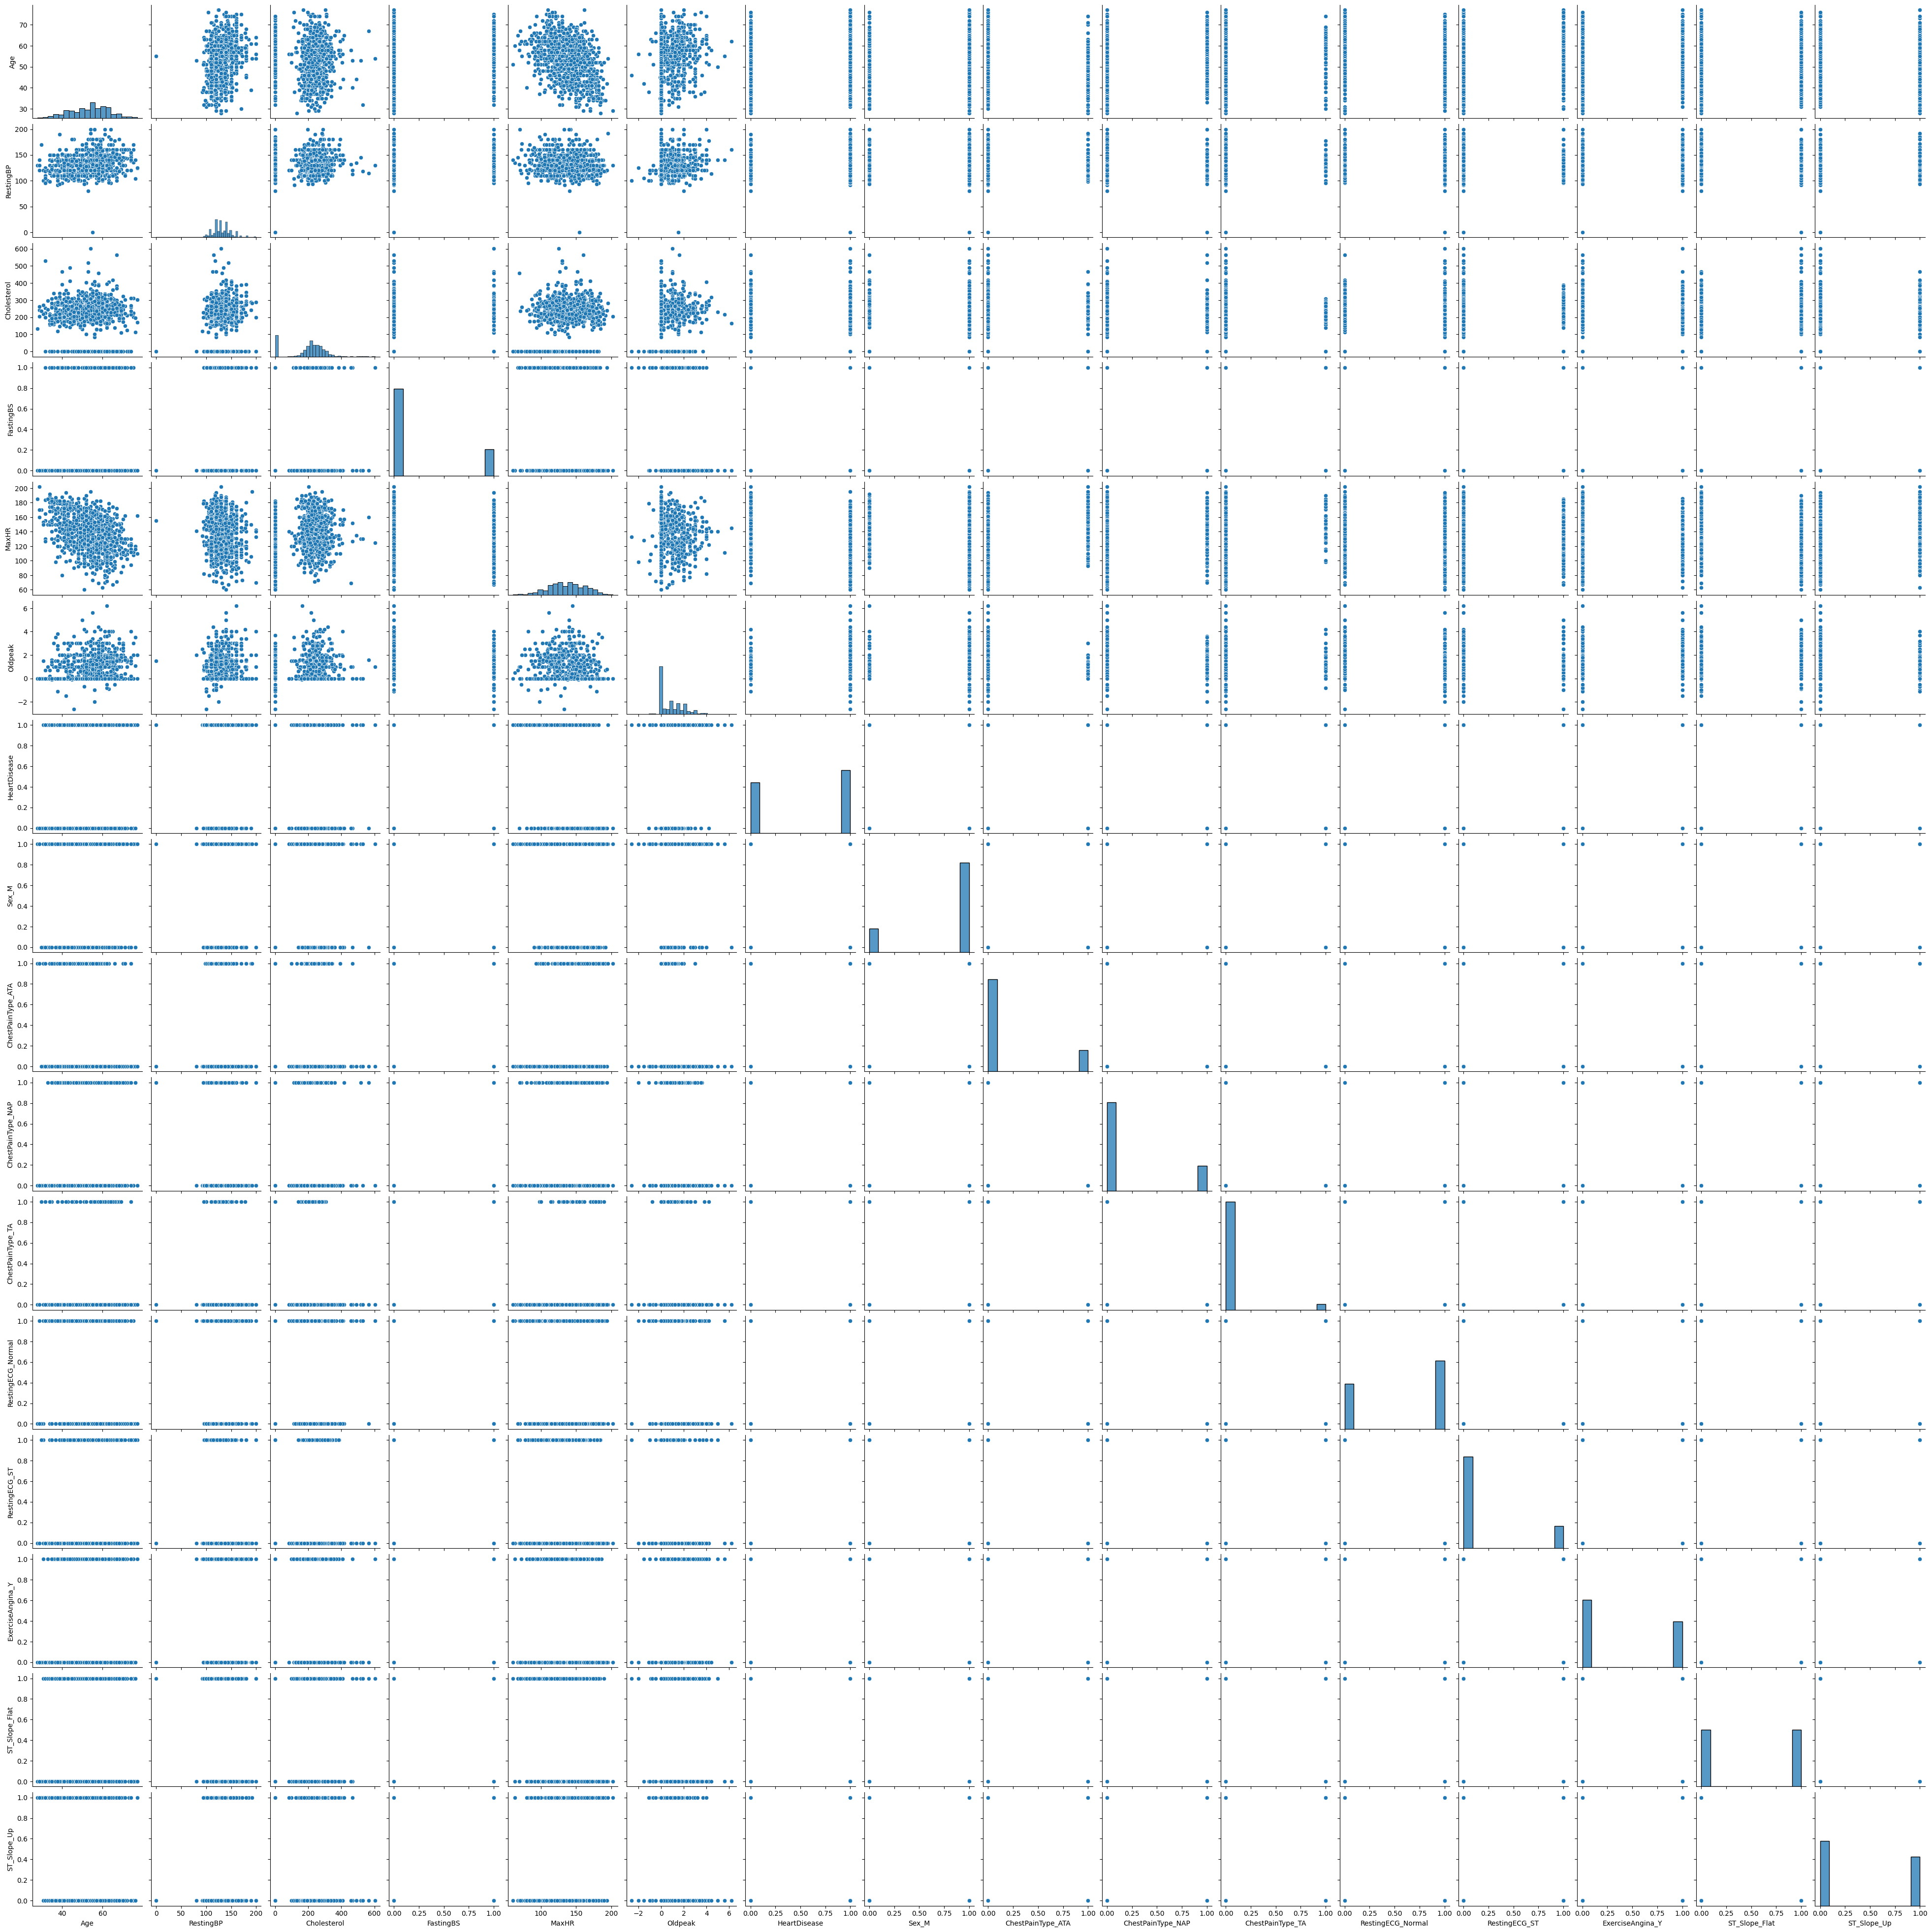

In [9]:
sns.pairplot(newdf)
plt.show()

### Split the columns into input and target variable

In [10]:
X = newdf.drop(columns = ['HeartDisease'])
y = newdf['HeartDisease']

### Standardise the data with StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
xcolumns = X.columns

In [14]:
X = scaler.fit_transform(X)

In [15]:
X = pd.DataFrame(X, columns = xcolumns)

In [16]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.515952,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,-1.938163,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.515952,2.075177,-0.532838,-0.229679,-1.228087,2.038947,-0.823556,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,-1.938163,-0.481887,-0.532838,-0.229679,0.814275,-0.490449,1.214246,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.515952,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674


### Split the data into training and testing set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 100)

### Check the shape of X_train and X_test

In [19]:
# X_train
X_train.shape

(642, 15)

In [20]:
X_test.shape

(276, 15)

## Create a KNN model and train it

Remember that we are trying to come up with a model to predict whether someone will have Heart Disease or Not. We'll start with k=1.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier(n_neighbors=1)

In [23]:
#Train the model
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Check the score of the model

In [24]:
model.score(X_train,y_train)

1.0

### Predict with X_test

In [25]:
y_pred = model.predict(X_test)

### Evaluate the prediction with metrics

In [26]:
from sklearn import metrics

#### Print confusion matrix

In [27]:
print(metrics.confusion_matrix(y_test,y_pred))

[[ 94  28]
 [ 26 128]]


#### Plot the confusion matrix on heatmap

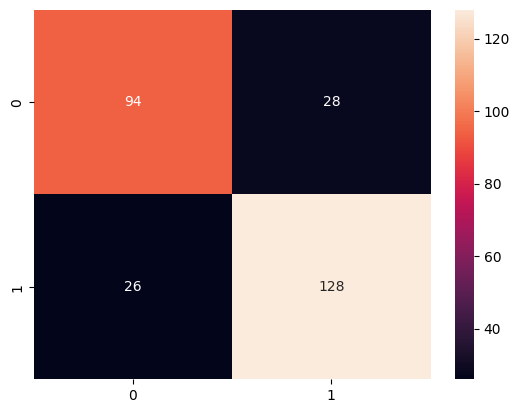

In [28]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

#### Print Classification_report

In [29]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       122
           1       0.82      0.83      0.83       154

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



## Choosing a <span style = "color: blue">K</span> value

Let's go ahead and use the elbow method to pick a good K Value:

In [30]:
error_rate = []

# Will take some time:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

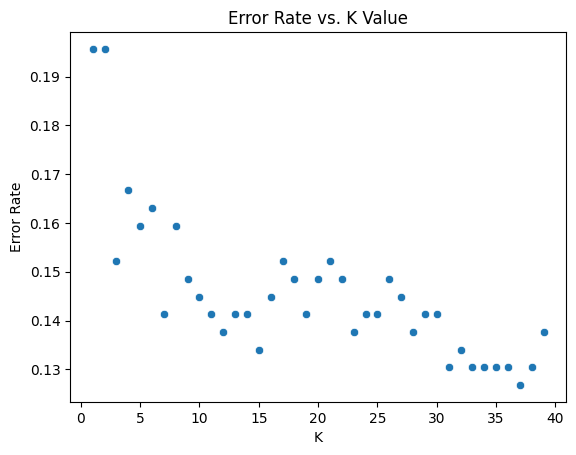

In [31]:
sns.scatterplot(x = range(1,40), y = error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Here we can see that around K = 37, the error rate falls below 0.13. Let's retrain the model with K = 37 and Check the accuracy

## Retrain the model with K = 37

### Firstly, a quick comparison to our original K=1 model

WITH K=1


              precision    recall  f1-score   support

           0       0.78      0.77      0.78       122
           1       0.82      0.83      0.83       154

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



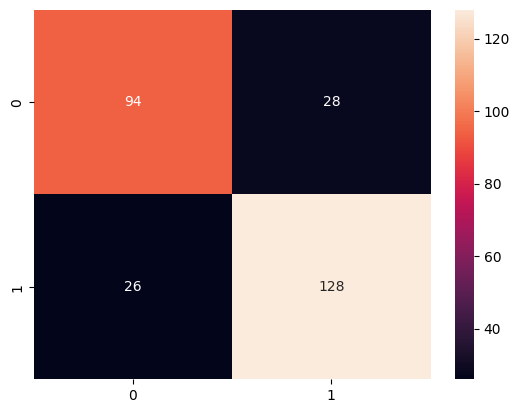

r2 score of our model is : 0.2038461538461538


In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(metrics.classification_report(y_test,pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

print('r2 score of our model is :', metrics.r2_score(pred, y_test))

### Now with K = 37

WITH K=37


              precision    recall  f1-score   support

           0       0.87      0.84      0.85       122
           1       0.88      0.90      0.89       154

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



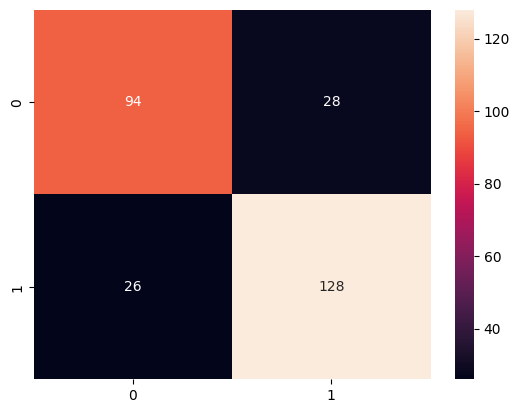

r2 score of our model is : 0.48295241663544397


In [33]:
knn = KNeighborsClassifier(n_neighbors=37)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=37')
print('\n')
print(metrics.classification_report(y_test,pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

print('r2 score of our model is :', metrics.r2_score(pred, y_test))

***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>